In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
sales_data = pd.read_excel(r"C:\Users\Srimathi\Downloads\ECOMM DATA.xlsx")


In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])

In [11]:
sales_data['Revenue'] = sales_data['Sales'] * sales_data['Quantity']

In [12]:
# Total Sales
total_sales = sales_data['Revenue'].sum()
print("Total Sales:", total_sales)


Total Sales: 61821272.47008


In [13]:
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

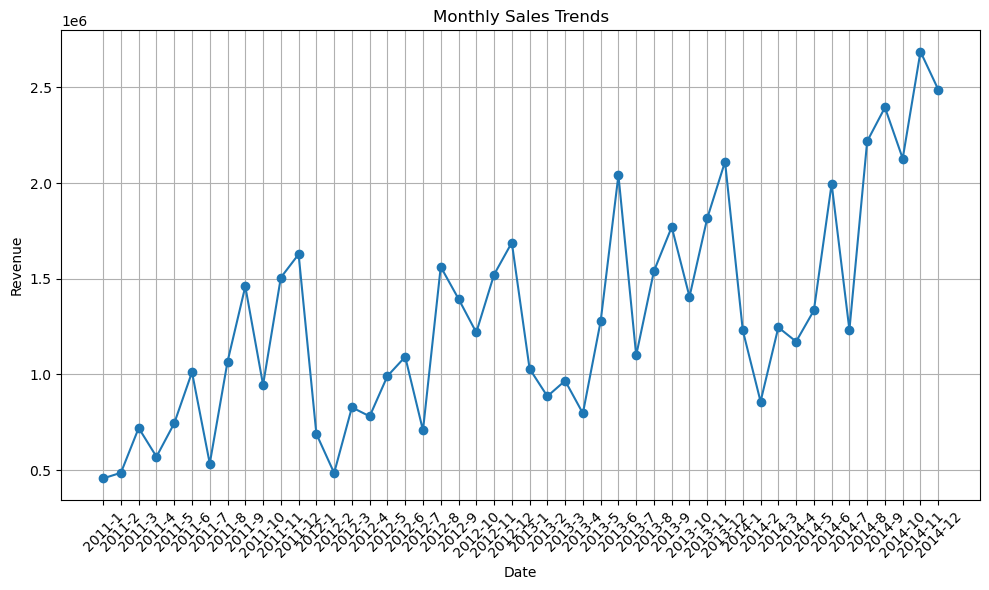

In [14]:
monthly_sales = sales_data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Revenue'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Best-Selling Products
best_selling_products = sales_data.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:")
print(best_selling_products)

Top 10 Best-Selling Products:
Product Name
Apple Smart Phone, Full Size                  432251.5012
Motorola Smart Phone, Full Size               383074.4508
Cisco Smart Phone, Full Size                  377353.4154
Nokia Smart Phone, Full Size                  297163.1875
Hon Executive Leather Armchair, Adjustable    295439.2319
Samsung Smart Phone, VoIP                     280221.3040
Canon imageCLASS 2200 Advanced Copier         253399.2760
SAFCO Executive Leather Armchair, Black       253072.7100
Samsung Smart Phone, Cordless                 245073.5400
Nokia Smart Phone, with Caller ID             244862.2575
Name: Revenue, dtype: float64


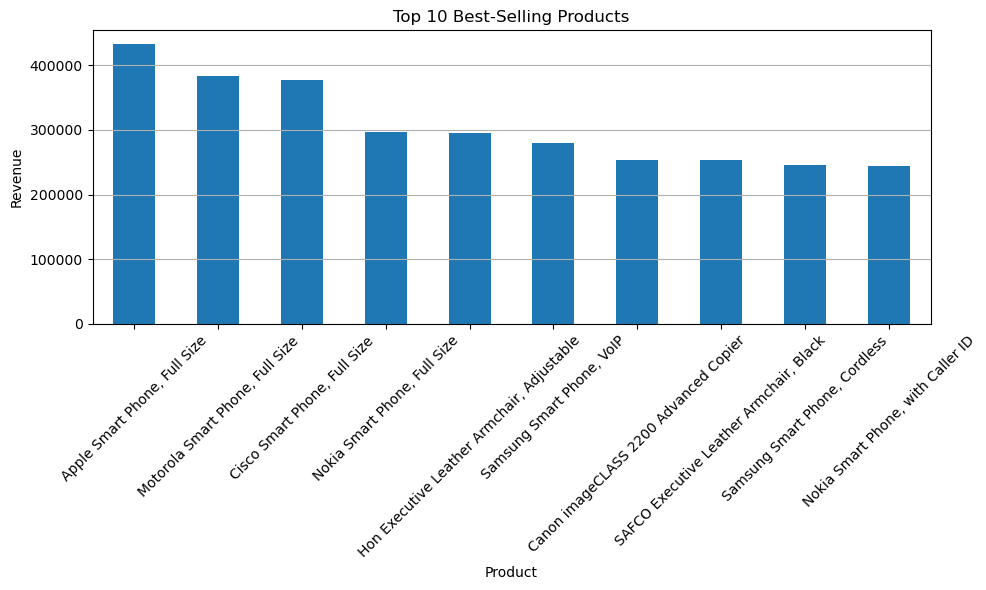

In [16]:
# Visualization
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()